First 10 values of data:
[[1.2       ]
 [1.13549691]
 [1.05735972]
 [0.98006452]
 [0.90818461]
 [0.8397853 ]
 [0.77730075]
 [0.7204677 ]
 [0.69750892]
 [0.66310947]]

Last 10 values of data:
[[0.93541958]
 [0.87841958]
 [0.8242268 ]
 [0.77322252]
 [0.72545566]
 [0.68065353]
 [0.63830471]
 [0.59790008]
 [0.55928447]
 [0.5228837 ]]


Running Reservoir-8: 100%|██████████| 1499/1499 [00:00<00:00, 5193.45it/s]
/usr/local/lib/python3.10/dist-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.17037e-17): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")
Running Ridge-6: 100%|██████████| 499/499 [00:00<00:00, 18443.89it/s]


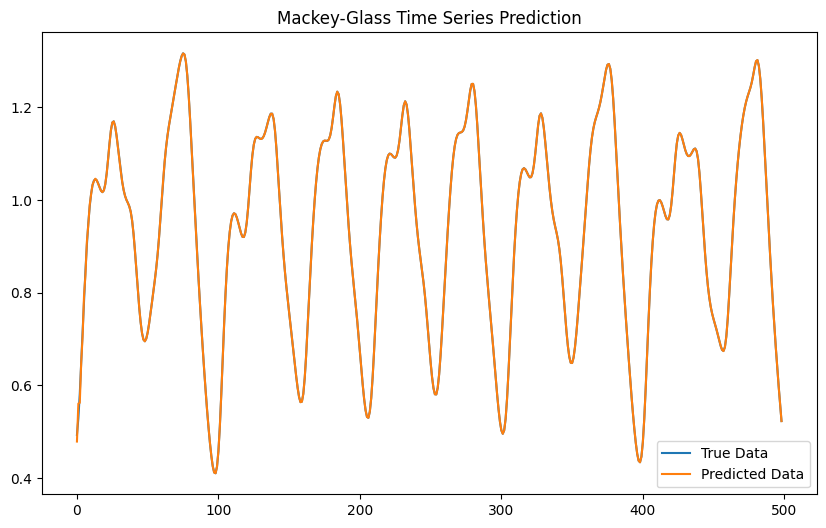

Mean Squared Error: 3.8902108612267515e-06


In [10]:
# installing the module
!pip install reservoirpy

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass
from sklearn.metrics import mean_squared_error

# loading the Mackey-Glass time series data
data = mackey_glass(n_timesteps=2000)

# printing the data
print("First 10 values of data:")
print(data[:10])
print("\nLast 10 values of data:")
print(data[-10:])

# splitting the data into training and testing sets
train_data, test_data = data[:1500], data[1500:]

# creating a reservoir with 100 units and a spectral radius of 0.9
reservoir = Reservoir(100, sr=0.9)

# collecting reservoir states by running the training data through the reservoir
states = reservoir.run(train_data[:-1])

# training the output layer using the Ridge regression from reservoirpy
readout = Ridge()
readout = readout.fit(states, train_data[1:])

# using the model to make predictions
test_states = reservoir.run(test_data[:-1])
predicted = readout.run(test_states)

# plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_data[1:], label="True Data")
plt.plot(predicted, label="Predicted Data")
plt.legend()
plt.title("Mackey-Glass Time Series Prediction")
plt.show()

# calculating the Mean Squared Error
mse = mean_squared_error(test_data[1:], predicted)
print(f"Mean Squared Error: {mse}")
